Data shape: (1797, 64)
Target shape: (1797,)


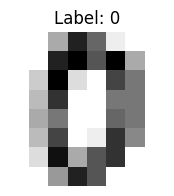


Training the SVM model (this may take a moment)...
Model training complete.

Model Accuracy: 97.96%

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.94      1.00      0.97        47
           3       0.98      0.94      0.96        54
           4       0.98      1.00      0.99        60
           5       0.97      1.00      0.99        66
           6       0.98      1.00      0.99        53
           7       1.00      0.96      0.98        55
           8       0.95      0.95      0.95        43
           9       0.98      0.93      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


--- Confusion Matrix ---


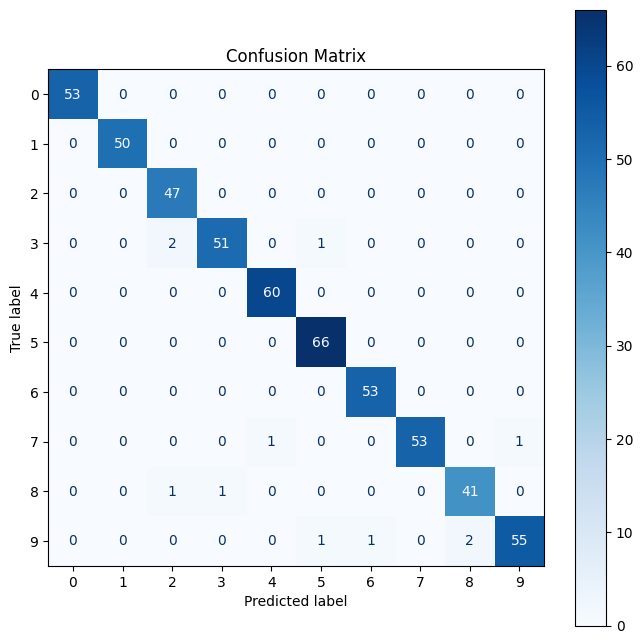

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

# --- 1. Load the Dataset ---
# This dataset contains 1797 images (8x8 pixels) of digits 0-9.
digits = load_digits()
X = digits.data  # Pixel data (features)
y = digits.target # The digit 0-9 (label)

# (Optional) Let's look at the first image
print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()

# --- 2. Split Data into Training and Test Sets ---
# We'll use 70% of the data for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 3. Preprocess the Data (Scaling) ---
# SVMs are very sensitive to the scale of the features.
# We must scale the pixel values (from 0-16) to have a mean of 0 and std dev of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Only transform test data

# --- 4. Train the SVM Model ---
# 'SVC' stands for Support Vector Classification
# We will use the 'rbf' (Radial Basis Function) kernel,
# which is excellent for non-linear problems like image recognition.
print("\nTraining the SVM model (this may take a moment)...")
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 5. Evaluate the Model ---
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# a. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# b. Show Classification Report
# This shows precision, recall, and f1-score for each digit (class)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# c. Show Confusion Matrix
# This helps visualize which digits the model is confusing
print("\n--- Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()